In [ ]:
# Active buses charts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# actives buses per day

df_actives_per_day = pd.read_csv("./metrics-calculation/actives-buses/active-buses-per-day.csv")

day_column = [day for day in range(1,32)]
df_actives_per_day["day"] = day_column

df_final = df_actives_per_day.sort_values(by=["day"])

In [ ]:
ax = df_final.plot.bar(x ="day",y = "number_of_vehicles",title=f"Número de ônibus ativos por dia",figsize=(26,10))
# x axis label
ax.set_xlabel("dia",size=15)
# y axis label
ax.set_ylabel("ônibus ativos",size=15)

# size of the number in both axis
ax.tick_params(axis='both', which='major', labelsize=15)

# title fontsize
ax.title.set_size(30)
# Setting x axis ticks
plt.xticks([hour for hour in range(1,32)])
# saving chart as png
ax.get_figure().savefig('./charts-results/actives-bus-per-day.png')

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Buses per hour per day
for day in range (1,32):
    df_hour_day = pd.read_parquet(f"./metrics-calculation/actives-buses/active-buses-per-hour/MO_1510{day}/").sort_values(by=["hour_avl"])
    ax = df_hour_day.plot(x ="hour_avl",y = "number_buses",title=f"Número de ônibus ativos por hora no dia {day}/10/2015",figsize=(8,6))
    # x axis label
    ax.set_xlabel("hora",size=15)
    # y axis label
    ax.set_ylabel("ônibus ativos",size=15)
    #plt.xticks([hour for hour in range(6,23)])
    # size of the number in both axis
    ax.tick_params(axis='both', which='major', labelsize=15)
    # title fontsize
    ax.title.set_size(15)
    plt.grid(True)
    # saving chart as png
    ax.get_figure().savefig(f'./charts-results/active-buses-per-hour/actives-bus-per-hour-{day}-10-2015.png')
    plt.close()

In [8]:
# Number of buses per region per hour

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Sao Paulo shape
sp = gpd.read_file("./shape-files-sp/DISTRITO_MUNICIPAL_SP_SMDUPolygon.shp")

days_to_analyze = [1,4,12,17,20]

for day in days_to_analyze:
    # speed by region per day
    actives_buses_region_hour = pd.read_parquet(f"./metrics-calculation/actives-buses/active-buses-per-hour-per-region/MO_1510{day}/")
    
    # getting the shape of the region
    df = pd.merge(actives_buses_region_hour, sp, left_on = "region", right_on = "Nome").drop(columns = ["Nome"])
    
    for hour in range(6,23):

        df_final = df[df["hour_avl"] == hour]

        geo_df = gpd.GeoDataFrame(df_final, geometry = "geometry")

        # Plotting map
#         ax = geo_df.plot(column="number_buses",legend=True,cmap='RdYlBu_r',legend_kwds={'label': "ônibus ativos"},figsize = (10,10))
        #ax = geo_df.plot(column="number_buses",figsize = (10,10),scheme="quantiles",cmap='RdYlBu_r',legend=True)
        ax = geo_df.plot(column="number_buses",figsize = (10,10),scheme="User_Defined",cmap='RdYlBu_r',legend=True,classification_kwds=dict(bins=[10,197,294,414,579,710,1667]))
        
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        
        plt.savefig(f'./charts-results/actives-buses-region-hour/active_bus_hour_region_{day}-10-2015/actives-bus-by-region-{hour}-hour-day_{day}-10-2015.png',bbox_inches='tight')
        
        plt.close()
        

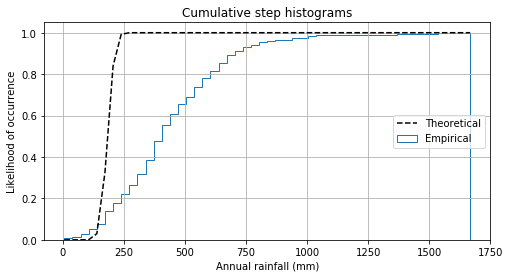

In [13]:
# https://matplotlib.org/3.1.0/gallery/statistics/histogram_cumulative.html

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(19680801)

actives_buses_region_hour = pd.read_parquet(f"./metrics-calculation/actives-buses/active-buses-per-hour-per-region/MO_15101/").sort_values(by=["hour_avl"])

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(actives_buses_region_hour["number_buses"], n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# # Overlay a reversed cumulative histogram.
# ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
#         label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()